In [2]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [3]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

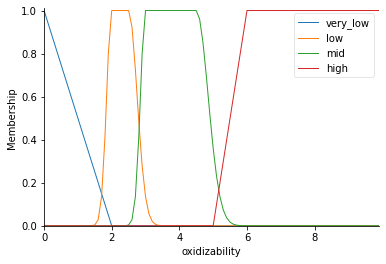

In [29]:
oxidizability = ctrl.Antecedent(np.arange(0, 10, 0.1), "oxidizability")

oxidizability['very_low'] = trapezoid(oxidizability.universe, -1, 0, 0, 2)
oxidizability["low"] = skf.gauss2mf(oxidizability.universe, 2, 0.15, 2.5, 0.25)
oxidizability["mid"] = skf.gauss2mf(oxidizability.universe, 3, 0.15, 4.5, 0.35)
oxidizability["high"] = trapezoid(oxidizability.universe, 5, 6, 10, 10)

oxidizability.view()

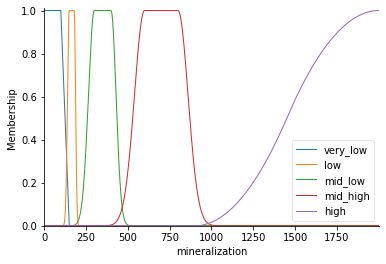

In [33]:
mineralization = ctrl.Antecedent(np.arange(0, 2000, 0.1), "mineralization")

mineralization['very_low'] = trapezoid(mineralization.universe, -1, 0, 100, 150)
mineralization["low"] = skf.gauss2mf(mineralization.universe, 150, 10, 180, 8)
mineralization["mid_low"] = skf.gauss2mf(mineralization.universe, 300, 35, 400, 30)
mineralization["mid_high"] = skf.gauss2mf(mineralization.universe, 600, 60, 800, 60)
mineralization["high"] = skf.smf(mineralization.universe, 900, 2000)

mineralization.view()

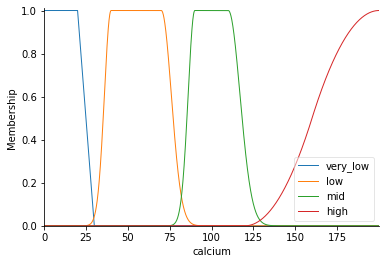

In [35]:
calcium = ctrl.Antecedent(np.arange(0, 200, 0.1), "calcium")

calcium['very_low'] = trapezoid(calcium.universe, -1, 0, 20, 30)
calcium["low"] = skf.gauss2mf(calcium.universe, 40, 4, 70, 6)
calcium["mid"] = skf.gauss2mf(calcium.universe, 90, 4, 110, 7)
calcium["high"] = skf.smf(calcium.universe, 120, 200)

calcium.view()

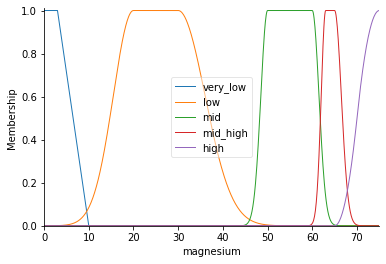

In [7]:
magnesium = ctrl.Antecedent(np.arange(0, 75, 0.1), "magnesium")

magnesium['very_low'] = trapezoid(magnesium.universe, -1, 0, 3, 10)
magnesium["low"] = skf.gauss2mf(magnesium.universe, 20, 4.5, 30, 6)
magnesium["mid"] = skf.gauss2mf(magnesium.universe, 50, 1.5, 60, 1.5)
magnesium["mid_high"] = skf.gauss2mf(magnesium.universe, 63, 1, 65, 1.5)
magnesium["high"] = skf.smf(magnesium.universe, 65, 75)

magnesium.view()

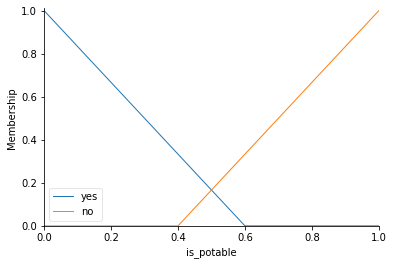

In [8]:
is_potable = ctrl.Consequent(np.arange(0, 1.1, 0.1), "is_potable")

is_potable['yes'] = trapezoid(is_potable.universe, -1, 0, 0, 0.6)
is_potable['no'] = trapezoid(is_potable.universe, 0.4, 1, 1, 2)

is_potable.view()

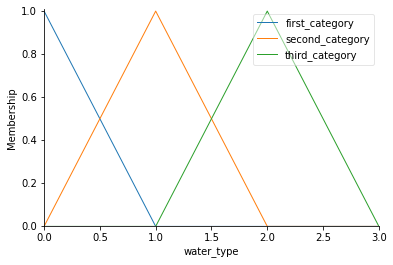

In [9]:
water_type = ctrl.Consequent(np.arange(0, 4, 1), "water_type")

water_type['first_category'] = trapezoid(water_type.universe, -1, 0, 0, 1)
water_type['second_category'] = trapezoid(water_type.universe, 0, 1, 1, 2)
water_type['third_category'] = trapezoid(water_type.universe, 1, 2, 2, 3)

water_type.view()

In [10]:
rule1 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['first_category']])

rule2 = ctrl.Rule(oxidizability['low'] | mineralization['mid_low'] | calcium['mid'] | magnesium['mid_high'], 
                  [is_potable['yes'], water_type['second_category']])
rule3 = ctrl.Rule(oxidizability['low'] | mineralization['low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])
rule4 = ctrl.Rule(oxidizability['low'] | mineralization['mid_low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])
rule5 = ctrl.Rule(oxidizability['low'] | mineralization['low'] | calcium['mid'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])
rule6 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['mid'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])
rule7 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_low'] | calcium['mid'] | magnesium['mid_high'], 
                  [is_potable['yes'], water_type['second_category']])
rule8 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])
rule9 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['second_category']])

rule10 = ctrl.Rule(oxidizability['mid'] | mineralization['mid_high'] | calcium['mid'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule11 = ctrl.Rule(oxidizability['low'] | mineralization['mid_high'] | calcium['mid'] | magnesium['mid_high'], 
                  [is_potable['yes'], water_type['third_category']])
rule12 = ctrl.Rule(oxidizability['mid'] | mineralization['low'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['third_category']])
rule13 = ctrl.Rule(oxidizability['low'] | mineralization['mid_low'] | calcium['mid'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule14 = ctrl.Rule(oxidizability['low'] | mineralization['low'] | calcium['low'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule15 = ctrl.Rule(oxidizability['low'] | mineralization['mid_low'] | calcium['low'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule16 = ctrl.Rule(oxidizability['low'] | mineralization['low'] | calcium['mid'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule17 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['mid'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule18 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_low'] | calcium['mid'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule19 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['low'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule20 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_low'] | calcium['low'] | magnesium['high'], 
                  [is_potable['yes'], water_type['third_category']])
rule21 = ctrl.Rule(oxidizability['low'] | mineralization['mid_high'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['third_category']])
rule23 = ctrl.Rule(oxidizability['low'] | mineralization['mid_high'] | calcium['mid'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['third_category']])
rule24 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_high'] | calcium['mid'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['third_category']])
rule25 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_high'] | calcium['mid'] | magnesium['mid_high'], 
                  [is_potable['yes'], water_type['third_category']])
rule26 = ctrl.Rule(oxidizability['very_low'] | mineralization['mid_high'] | calcium['low'] | magnesium['mid'], 
                  [is_potable['yes'], water_type['third_category']])

rule28 = ctrl.Rule(oxidizability['high'] | mineralization['very_low'] | calcium['very_low'] | magnesium['low'], 
                  [is_potable['no']])
rule29 = ctrl.Rule(oxidizability['high'] | mineralization['high'] | calcium['high'] | magnesium['high'], 
                  [is_potable['no']])
rule31 = ctrl.Rule(oxidizability['high'] | mineralization['low'] | calcium['high'] | magnesium['high'], 
                  [is_potable['no']])
rule32 = ctrl.Rule(oxidizability['mid'] | mineralization['mid_low'] | calcium['very_low'] | magnesium['high'], 
                  [is_potable['no']])
rule33 = ctrl.Rule(oxidizability['very_low'] | mineralization['very_low'] | calcium['very_low'] | magnesium['high'], 
                  [is_potable['no']])
rule34 = ctrl.Rule(oxidizability['high'] | mineralization['mid_high'] | calcium['low'] | magnesium['low'], 
                  [is_potable['no']])
rule35 = ctrl.Rule(oxidizability['high'] | mineralization['mid_high'] | calcium['low'] | magnesium['high'], 
                  [is_potable['no']])
rule36 = ctrl.Rule(oxidizability['very_low'] | mineralization['very_low'] | calcium['very_low'] | magnesium['high'], 
                  [is_potable['no']])

In [11]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule28,
              rule29, rule31, rule32, rule33, rule34, rule35, rule36]

mark_ctrl = ctrl.ControlSystem(rules_base)

In [12]:
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.4999999999999999


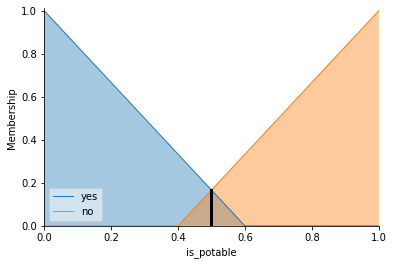

In [18]:
#rule1 = ctrl.Rule(oxidizability['very_low'] | mineralization['low'] | calcium['low'] | magnesium['mid'], 
#                  [is_potable['yes'], water_type['first_category']])
marking.input['oxidizability'] = 5
marking.input['mineralization'] = 150
marking.input['calcium'] = 80
marking.input['magnesium'] = 100
marking.compute()

print(marking.output['is_potable'])
is_potable.view(sim=marking)

1.2666666666666668


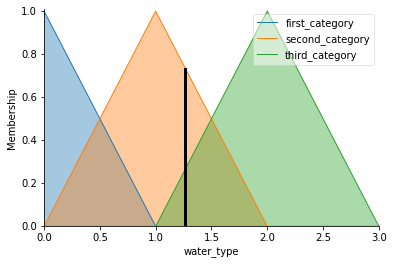

In [19]:
print(marking.output['water_type'])
water_type.view(sim=marking)